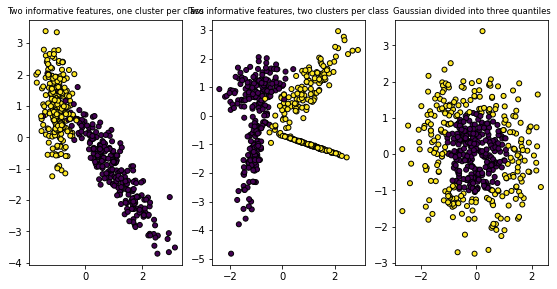

In [1]:
import matplotlib.pyplot as plt
import time
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.model_selection import train_test_split
plt.figure(figsize=(8, 4))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)


plt.subplot(131)
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=500,n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(132)
plt.title("Two informative features, two clusters per class",
          fontsize='small')
X2, Y2 = make_classification(n_samples=500, n_features=2, 
                             n_redundant=0, 
                             n_informative=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')


plt.subplot(133)
plt.title("Gaussian divided into three quantiles", fontsize='small')
X3, Y3 = make_gaussian_quantiles(n_samples=500,n_features=2, n_classes=2)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3,
            s=25, edgecolor='k')

plt.show()  # various graphs

In [2]:
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from math import exp

In [3]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split


# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
          correct += 1
    return correct / float(len(actual)) * 100.0


# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores

# Base Learner: Perceptron

---

In [4]:
# Make a prediction with weights
def perceptron_predict(model, row):
    activation = model[0]
    for i in range(len(row)-1):
        activation += model[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def perceptron_model(train, l_rate=0.01, n_epoch=5000):
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            prediction = perceptron_predict(weights, row)
            error = row[-1] - prediction
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
    return weights

# Meta Learner: Logistic Regression

---



In [5]:
# Make a prediction with coefficients
def logistic_regression_predict(model, row):
    yhat = model[0]
    for i in range(len(row)-1):
        yhat += model[i + 1] * row[i]
    return 1.0 / (1.0 + exp(-yhat))

# Estimate logistic regression coefficients using stochastic gradient descent
def logistic_regression_model(train, l_rate=0.01, n_epoch=5000):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
          yhat = logistic_regression_predict(coef, row)
          error = row[-1] - yhat
          coef[0] = coef[0] + l_rate * error * yhat * (1.0 - yhat)
          for i in range(len(row)-1):
              coef[i + 1] = coef[i + 1] + l_rate * error * yhat * (1.0 - yhat) * row[i]
    return coef

# STACKING

---



In [6]:
# Make predictions with sub-models and construct a new stacked row
def to_stacked_row(models, predict_list, row):
	stacked_row = list()
	for i in range(len(models)):
		prediction = predict_list[i](models[i], row)
		stacked_row.append(prediction)
	stacked_row.append(row[-1])
	return row[0:len(row)-1] + stacked_row
 

In [7]:
# Stacked Generalization Algorithm
def stacking(train, test):
	model_list = [perceptron_model, perceptron_model, perceptron_model]
	predict_list = [perceptron_predict, perceptron_predict, perceptron_predict]
	models = list()
	for i in range(len(model_list)):
		model = model_list[i](train)
		models.append(model)
	stacked_dataset = list()
	for row in train:
		stacked_row = to_stacked_row(models, predict_list, row)
		stacked_dataset.append(stacked_row)
	stacked_model = logistic_regression_model(stacked_dataset)
	predictions = list()
	for row in test:
		stacked_row = to_stacked_row(models, predict_list, row)
		stacked_dataset.append(stacked_row)
		prediction = logistic_regression_predict(stacked_model, stacked_row)
		prediction = round(prediction)
		predictions.append(prediction)
	return predictions

## 1.veriseti için

---



In [8]:
X1 = X1.tolist()
Y1 = Y1.tolist()

data1 = [x + [y] for x, y in zip(X1, Y1)]

In [9]:
n_folds = 4
scores = evaluate_algorithm(data1, stacking, n_folds)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [99.2, 96.0, 96.0, 96.8]
Mean Accuracy: 97.000%


## 2.veriseti için

---



In [10]:
X2 = X2.tolist()
Y2 = Y2.tolist()

data1 = [x + [y] for x, y in zip(X2, Y2)]

In [11]:
n_folds = 4
scores = evaluate_algorithm(data1, stacking, n_folds)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [96.8, 99.2, 97.6, 100.0]
Mean Accuracy: 98.400%


## 3.veriseti için

---



In [12]:
X3 = X3.tolist()
Y3 = Y3.tolist()

data1 = [x + [y] for x, y in zip(X3, Y3)]

In [14]:
n_folds = 4
scores = evaluate_algorithm(data1, stacking, n_folds)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [60.0, 80.80000000000001, 48.8, 72.8]
Mean Accuracy: 65.600%
